In [1]:
%plot inline -w 800 -h 800
function draw_system(A,b)
    sol=A\b;
    x1=linspace(sol(1)-10,sol(1)+10,100);

    x2=(b(1)-A(1,1)*x1)/A(1,2);
    plot(x1,x2,"linewidth",10,"color", [1 0 0])
    hold on;

    x2=(b(2)-A(2,1)*x1)/A(2,2);
    plot(x1,x2,"linewidth",10,"color", [0 0 1])

    xlabel("X1");
    ylabel("X2");
    set(gca, "linewidth", 4, "fontsize", 12)
    set(gca, 'XTick', floor(sol(1))-10:floor(sol(1))+10)
    set(gca, 'YTick', floor(sol(2))-20:floor(sol(2))+20)
endfunction

function draw_point(p,clr,txt)
    plot(p(1),p(2),'og',"linewidth",10,"color", clr)
    h=text(p(1),p(2)+1,txt);
    set(h, 'fontsize', 16);
endfunction

function draw_dotted_lines_gz(x0,x1)
    limits = axis ();
    line([limits(1) limits(2)], [x0(2) x0(2)], "linestyle", "--", "color", "magenta")
    line([x1(1) x1(1)], [limits(3) limits(4)], "linestyle", "--", "color", "black")
    %line([-10 10], [x0(2) x0(2)], "linestyle", "--", "color", "magenta")
    %line([x1(1) x1(1)], [-20 30], "linestyle", "--", "color", "black")
endfunction

function draw_dotted_lines(x0,x1)
    limits = axis ();
    line([limits(1) limits(2)], [x0(2) x0(2)], "linestyle", "--", "color", "magenta")
    line([x1(1) x1(1)], [limits(3) limits(4)], "linestyle", "--", "color", "black")
    line([limits(1) limits(2)], [x1(2) x1(2)], "linestyle", "--", "color", "black")
    line([x0(1) x0(1)], [limits(3) limits(4)], "linestyle", "--", "color", "magenta")
endfunction

# Iterativne metode za rešavanje sistema jednačina

### Na prethodnom predavanju radili smo Gausovu eliminaciju koja je direktan metod.
### Direktni metodi rezultuju samo jednim rešenjem, odnosno nemaju trenutno i prethodno rešenje.
### Za razliku od direktnih, iterativne metode prozivode niz rešenja.
### Krećemo od nekog početnog rešenja $x_0$ i pomoću iterativne formule proizvodimo niz:
### $$x_0,x_1,x_2,\dots,x_k,x_{k+1},\dots$$

### Iterativna formula je način pomoću koga od trenutnog rešenja $x_k$ dobijamo sledeće rešenje $x_{k+1}$.
### Iterativna formula u suštini čini iterativni metod, odnosno po tome se iteretivne metode razlikuju međusobno.

### Iteratvini metod možemo zaustaviti na više načina. Sledeća dva načina se najviše koriste:
* #### Posle unapred zadatog broja iteracija
* #### Kada se treutno i prethodno rešenje razlikuju veoma malo, tipično ispod nekog unapred zadatog praga $tačnost$:

### $$\lvert x_{k+1}-x_k \rvert<\text{tačnost}$$

# Jakobijev metod

### Iterativnu formulu za Jakovijev metod objasnićemo na primeru sistema od dve jednačine sa dve nepoznate.

### $$2x_1-x_2=3\\-2x_1-x_2=3$$

In [24]:
A=[2,1;1,2];
b=[6,6]';

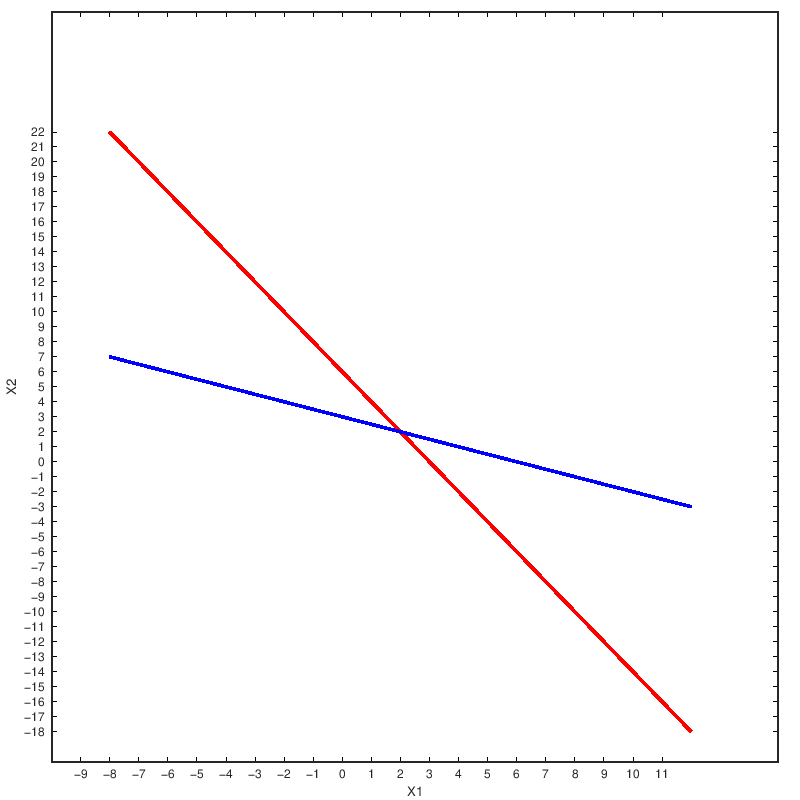

In [25]:
draw_system(A,b)

In [4]:
A\b

ans =

   2.0000
   2.0000



### Cilj nam je da od trenutnog rešenja, tj. neke dve vrednosti za $x^k_1$ i $x^k_2$ proizvedemo sledeće rešenje, tj. dve nove vrednosti za $x^{k+1}_1$ i $x^{k+1}_2$.

### Krećemo od zadatog sistema:

### $$2x_1+x_2=6\\x_1+2x_2=6$$

### Izražavamo iz svake jednačine nepoznate, tako da pazimo na redosled.
### Iz prve jedančine izražavamo prvu nepoznatu $x_1$, iz druge jednačine drugu nepoznatu $x_2$ i tako redom.
### Redosled jednačina je veoma važan jer utiče na konvergenciju metoda.
### Ne postoji pravilo po kome se bira redosled, već je to predmet eksperimentisanja (što je dosta često u oblastima kao što su Numerika ili Veštačka inteligencija).

### $$x_1=\frac{(6-x_2)}{2}\\x_2=\frac{(6-x_1)}{2}$$

### Zadajemo neko početno rešenje, na slučajan način:

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\end{bmatrix}=\begin{bmatrix}5\\10\end{bmatrix}$$

### Koristimo nepoznate koje smo izrazili kao iterativnu formulu.
### Prva jednačina iz koje smo izrazili $x_1$ službi nam da od $x^0_1$ dobijemo novo, tj. sledeće $x^1_1$, a druga za $x_2$ i tako redom.

### $$x^1_1=\frac{(6-x^0_2)}{2}=x^1_1=\frac{(6-10)}{2}=-2\\x^1_2=\frac{(6-x^0_1)}{2}=\frac{(6-5)}{2}=\frac{1}{2}$$

### Implementiramo zamenu početnog rešenja u iterativnu formulu Jakobijevog metoda.

In [27]:
format short

In [28]:
x0=[5,10]
x1=zeros(2,1);
x1(1) = (6 - x0(2))/2;
x1(2) = (6 - x0(1))/2;
x1=x1'

x0 =

    5   10

x1 =

  -2.00000   0.50000



x0 =

    5   10

x1 =

  -2.00000   0.50000



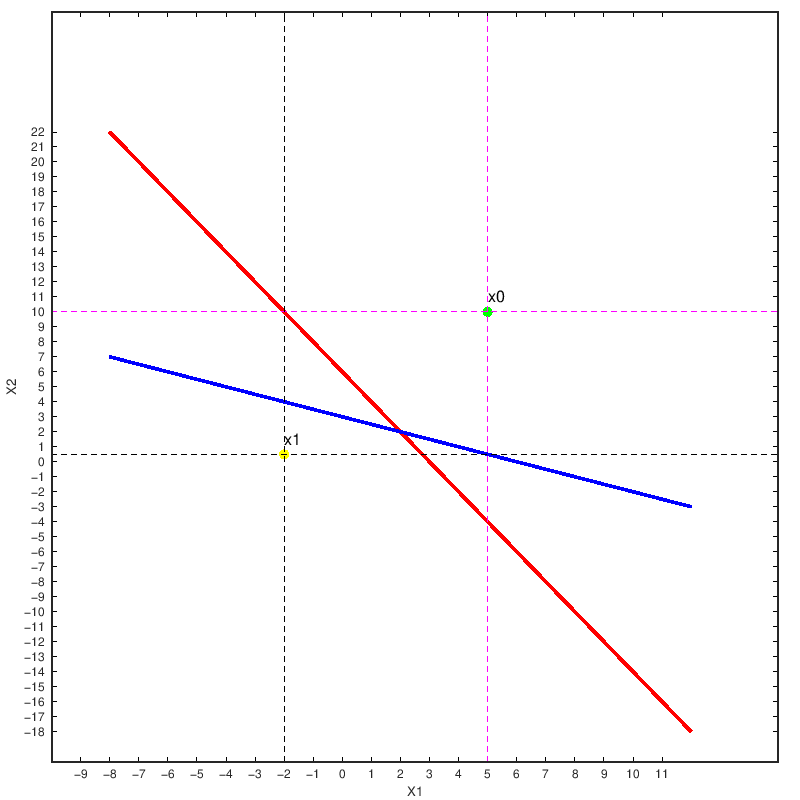

In [29]:
x0
x1
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1)

### Nakon što smo od $x^0$ odbili sada ubacujemo $x^1$ u iterativnu formulu da dobijemo $x^2$.

x0 =

  -2.00000   0.50000

x1 =

   2.7500   4.0000



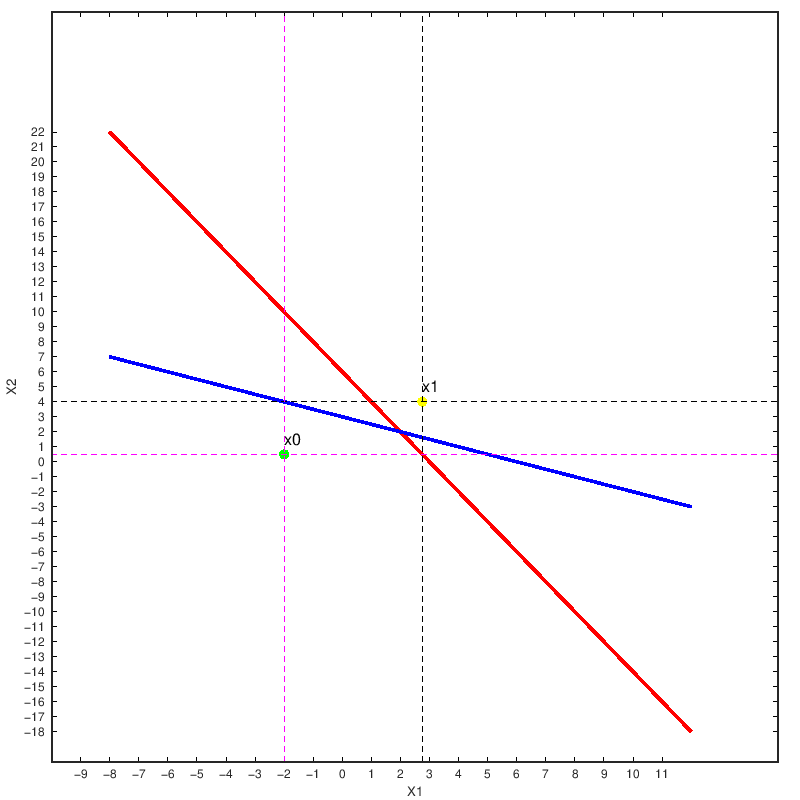

In [30]:
x0=x1
x1=zeros(2,1);
x1(1) = (6 - x0(2))/2;
x1(2) = (6 - x0(1))/2;
x1=x1'
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1)

### Uopštavamo kod da bi mogli da ga primenimo na bilo koji sistem koji je 2x2.

In [31]:
A
b

A =

   2   1
   1   2

b =

   6
   6



In [32]:
%umesto konstanti, kao u kodu ranije, sada koristimo elemente matrice A i vektora b, da bi kod mogao da se primeni na bilo koji sistem 2x2.
x0=[5,10];
x1=zeros(2,1);
x1(1) = (b(1) - A(1,2)*x0(2))/A(1,1);
x1(2) = (b(2) - A(2,1)*x0(1))/A(2,2);
x1

x1 =

  -2.00000
   0.50000



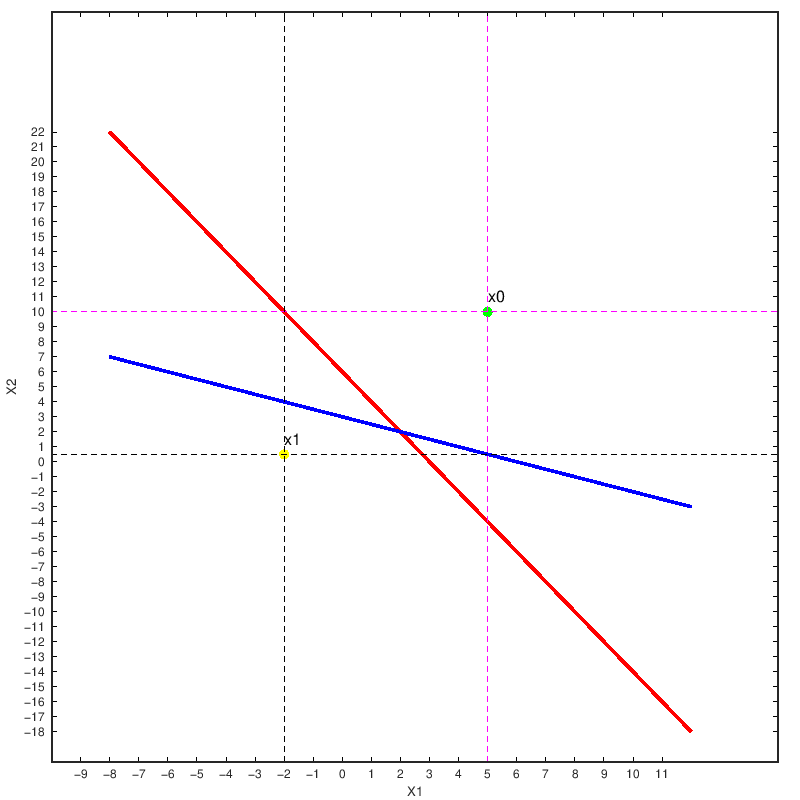

In [33]:
%crtamo resenje sa upostenim kodom
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1)

### Dodajemo *for* petlju koja izvršava iteracije. Sada možemo da proizvedemo proizvoljan broj rešenja.

x1 =

   1.4375
   1.7500

ans =

   2.0000
   2.0000



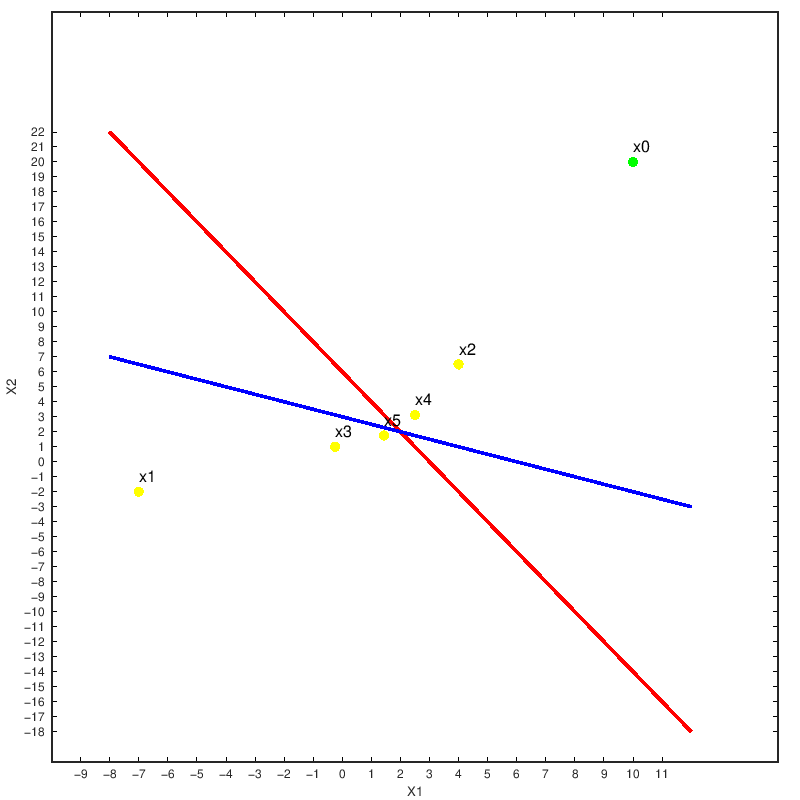

In [34]:
x0=[10,20];
draw_system(A,b);
draw_point(x0,[0, 1, 0],'x0');
x1=zeros(2,1);
maxIter = 5;
for i=1:maxIter
    x1(1) = (b(1) - A(1,2)*x0(2))/A(1,1);
    x1(2) = (b(2) - A(2,1)*x0(1))/A(2,2);
    draw_point(x1,[1, 1, 0],strcat('x', num2str(i)))
    %draw_dotted_lines(x0,x1)
    x0=x1;
end
x1
A\b

#### Pogledaćemo sada animaciju geometrijske intepretacije Jakovijevog metod sa slajdova.

### Kako bi lakše napisali upošten kod za Jakobijev metod, primenićemo prvo metod na sistem sa tri jednačine i tri nepoznate.

### $$4x_1-x_2-x_3=3\\-2x_1+6x_2+x_3=9\\-x_1+x_2+7x_3=-6$$

### Izražavamo promenljive:

### $$x_1=(3+x_2+x_3)/4\\x_2=(9+2x_1-x_3)/6\\x_3=(-6+x_1-x_2)/7$$

### Zadajemo početno rešenje:

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\\x^0_{3}\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$

### Koristimo iterativnu formulu da proizvedemo sledeće rešenje:

### $$x^1_1=(3+x^0_2+x^0_3)/4=(3+2+3)/4=2\\x^1_2=(9+2x^0_1-x^0_3)/6=(9+2\cdot1-3)/6=\frac{4}{3}\\x^1_3=(-6+x^0_1-x^0_2)/7=(-6+1-2)/7=-1$$

### Pišemo sada funkciju za Jakobijev metod i povezujemo je sa primerom sistema 3x3.

In [13]:
function x=jacobi(A,b,x0,maxIter,tacnost)
[n,m] = size(A);
x1=zeros(n,1)';
for k=1:maxIter
   for i=1:n
        s=0; %ovo je suma vrednosti koje "prebacujemo na drugu stranu" kada izražavmo svaku nepoznatu
        for j=1:n
            if(i~=j) %pošto je nepoznata i sa leve strane jednakosti, ne može da se nađe u sumi sa desne strane, pa je zato preskačemo
                s = s + A(i,j)*x0(j);
            end
        end
        x1(i) = (b(i) - s)/A(i,i); % izračunavamo vrednost promenljive koju smo izrazili
    end
    if(norm(x0-x1,"inf")<tacnost) %proveravmo da li je razlika trenutnog i početnog rešenja pala ispod zadate tačnosti
        break;
    end
    x0=x1;
end
x=x1;
endfunction

In [23]:
[1,2,3]-[4,8,3]

ans =

  -3  -6   0



In [35]:
A=[4,-1,-1;-2,6,1;-1,1,7]
b=[3,9,-6]'
x=jacobi(A,b,[1,2,3],100,10^-5)

A =

   4  -1  -1
  -2   6   1
  -1   1   7

b =

   3
   9
  -6

x =

   1.00000   2.00000  -1.00000



### Dodaćemo sada u kod malo ispisa da bi mogli da pratimo rešenje kroz iteracije. Slobodno možete ignorisati kod za ispis jer nije deo gradiva.

In [36]:
function x=jacobi_ispis(A,b,x0,maxIter,tacnost)
[n,m] = size(A);
x1=zeros(n,1)';
disp("iter\ttrenutno rešenje\tnorma razlike između trenutnog i prethodnog rešenja"); %ovo je deo za ispis i možete ga ignorisati 
for k=1:maxIter
   for i=1:n
        s=0; %ovo je suma vrednosti koje "prebacujemo na drugu stranu" kada izražavmo svaku nepoznatu
        for j=1:n
            if(i~=j) %pošto je nepoznata i sa leve strane jednakosti, ne može da se nađe u sumi sa desne strane, pa je zato preskačemo
                s = s + A(i,j)*x0(j);
            end
        end
        x1(i) = (b(i) - s)/A(i,i); % izračunavamo vrednost promenljive koju smo izrazili
    end
    if(norm(x0-x1,"inf")<tacnost) %proveravmo da li je razlika trenutnog i početnog rešenja pala ispod zadate tačnosti
        break;
    end
    %ovo je deo za ispis i možete ga ignorisati
    temp = sprintf('%.16f\t',[k x0 norm(x0-x1,"inf")]);
    disp(temp);
    x0=x1;
end
x=x1;
endfunction

In [37]:
format long
A=[4,-1,-1;-2,6,1;-1,1,7];
b=[3,9,-6]';
x=jacobi_ispis(A,b,[1,2,3],100,10^-5)

iter	trenutno rešenje	norma razlike između trenutnog i prethodnog rešenja
1.0000000000000000	1.0000000000000000	2.0000000000000000	3.0000000000000000	4.0000000000000000	
2.0000000000000000	2.0000000000000000	1.3333333333333333	-1.0000000000000000	1.1666666666666667	
3.0000000000000000	0.8333333333333333	2.3333333333333335	-0.7619047619047619	0.4285714285714286	
4.0000000000000000	1.1428571428571428	1.9047619047619049	-1.0714285714285714	0.1845238095238094	
5.0000000000000000	0.9583333333333334	2.0595238095238098	-0.9659863945578231	0.0790816326530615	
6.0000000000000000	1.0233843537414966	1.9804421768707483	-1.0144557823129252	0.0318877551020409	
7.0000000000000000	0.9914965986394557	2.0102040816326530	-0.9938654033041788	0.0140609815354711	
8.0000000000000000	1.0040846695821184	1.9961431000971819	-1.0026724975704568	0.0057170189504372	
9.0000000000000000	0.9983676506316812	2.0018069727891157	-0.9988654900735805	0.0025401742329583	
10.0000000000000000	1.0007353706788837	1.9992667985561

In [38]:
A=[2,1;1,2];
b=[6,6]';
x=jacobi_ispis(A,b,[5,10],100,10^-5)

iter	trenutno rešenje	norma razlike između trenutnog i prethodnog rešenja
1.0000000000000000	5.0000000000000000	10.0000000000000000	9.5000000000000000	
2.0000000000000000	-2.0000000000000000	0.5000000000000000	4.7500000000000000	
3.0000000000000000	2.7500000000000000	4.0000000000000000	2.3750000000000000	
4.0000000000000000	1.0000000000000000	1.6250000000000000	1.1875000000000000	
5.0000000000000000	2.1875000000000000	2.5000000000000000	0.5937500000000000	
6.0000000000000000	1.7500000000000000	1.9062500000000000	0.2968750000000000	
7.0000000000000000	2.0468750000000000	2.1250000000000000	0.1484375000000000	
8.0000000000000000	1.9375000000000000	1.9765625000000000	0.0742187500000000	
9.0000000000000000	2.0117187500000000	2.0312500000000000	0.0371093750000000	
10.0000000000000000	1.9843750000000000	1.9941406250000000	0.0185546875000000	
11.0000000000000000	2.0029296875000000	2.0078125000000000	0.0092773437500000	
12.0000000000000000	1.9960937500000000	1.9985351562500000	0.004638671875000

# Gaus-Zajedelov metod

### Jakobijev postupak u trenutnoj iteraciji ne koristi najnovije informacije o rešenju. 
### Konkretnije kad računamo $x^1_1$ i $x^1_2$, koristimo $x^0_1$ i $x^0_2$ ali, pre nego što izračunamo $x^1_2$ vrednost $x^1_1$ je već izračunata. 
### Ako pretpostavimo da metod konvergira vrednost $x^1_1$ je jedan korak bliža tačnom rešnju od $x^0_1$, pa se postavlja pitanje da li je možemo iskoristiti umesto $x^0_1$.
### Na taj način dobijamo Gaus−Zajdelov postupak.

<center><img src="GausZ.png" width="600" height="600"></center>

### Primenjujemo Gaus-Zajdelov metod na isti primer 2x2 sistema na kome smo pokazali Jakobijev metod.

### $$2x_1+x_2=6\\x_1+2x_2=6$$

### $$x^{novo}_1=\frac{(6-x^{staro}_2)}{2}\\x^{novo}_2=\frac{(6-x^{novo}_1)}{2}$$

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\end{bmatrix}=\begin{bmatrix}5\\10\end{bmatrix}$$

### $$x^1_1=\frac{(6-x^0_2)}{2}=x^1_1=\frac{(6-10)}{2}=-2\\x^1_2=\frac{(6-x^1_1)}{2}=\frac{(6+2)}{2}=4$$

### $$x^2_1=\frac{(6-x^1_2)}{2}=x^2_1=\frac{(6-4)}{2}=1\\x^2_2=\frac{(6-x^2_1)}{2}=\frac{(6-1)}{2}=\frac{5}{2}$$

### Sada samo izvršavamo funkciju za Gaus-Zajdelov metod, a kod ćemo objasniti kasnije.

In [39]:
function x=gausz_viz(A,b,x0,maxIter,tacnost)
[n,m] = size(A);

if(n==2) draw_point(x0,[1, 1, 0],strcat('x', num2str(0))) end %ovo je deo za prikaz grafika i možete ga ignorisati

x1=zeros(n,1)';
for k=1:maxIter
   for i=1:n
        s=0; %sumu s razdvajamo na dve petlje, u prvoj koristimo novo rešenje x1, a drugoj staro x0.
        for j=1:i-1
            s = s + A(i,j)*x1(j);
        end
        for j=i+1:n
             s = s + A(i,j)*x0(j);
        end
        x1(i) = (b(i) - s)/A(i,i);
    end
    
    if(n==2) %ovo je deo za prikaz grafika i možete ga ignorisati
        draw_point(x1,[1, 1, 0],strcat('x', num2str(k)))
        draw_dotted_lines_gz(x0,x1)
    end
    
    if(norm(x0-x1,"inf")<tacnost)
        break;
    end
    x0=x1;
end
x=x1;
endfunction

x0 =

    5   10

x =

  -2   4



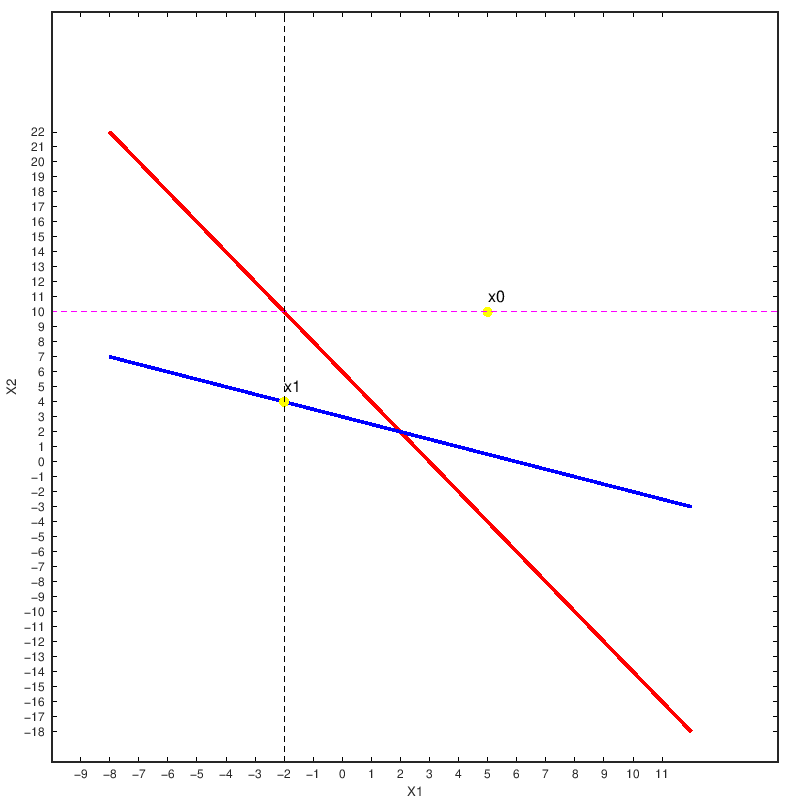

In [40]:
A=[2,1;1,2];
b=[6,6]';
draw_system(A,b)
x0=[5,10]
x=gausz_viz(A,b,x0,1,10^-5)

x0 =

    5   10

x =

   1.000000000000000   2.500000000000000



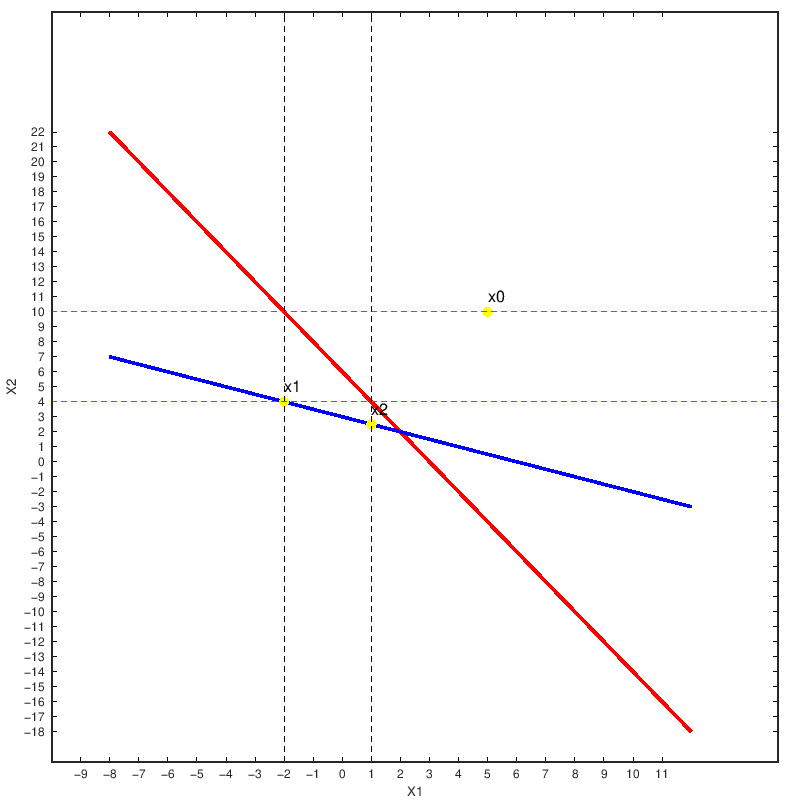

In [41]:
A=[2,1;1,2];
b=[6,6]';
draw_system(A,b)
x0=[5,10]
x=gausz_viz(A,b,x0,2,10^-5)

#### Pogledaćemo sada animaciju geometrijske intepretacije Jakovijevog metod sa slajdova.

### Pišemo kod za Gaus-Zajdelov metod. Kao pomoć koristimo isti primer 3x3 sistema kao za Jakobijev metod.

### $$4x_1-x_2-x_3=3\\-2x_1+6x_2+x_3=9\\-x_1+x_2+7x_3=-6$$

### $$x^{novo}_1=(3+x^{staro}_2+x^{staro}_3)/4\\x^{novo}_2=(9+2x^{novo}_1-x^{staro}_3)/6\\x^{novo}_3=(-6+x^{novo}_1-x^{novo}_2)/7$$

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\\x^0_{3}\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$

### $$x^1_1=(3+x^0_2+x^0_3)/4=(3+2+3)/4=2\\x^1_2=(9+2x^1_1-x^0_3)/6=(9+2\cdot2-3)/6=\frac{5}{3}\\x^1_3=(-6+x^1_1-x^1_2)/7=(-6+2-\frac{5}{3})/7=-\frac{17}{21}$$

In [43]:
function x=gausz(A,b,x0,maxIter,tacnost)
[n,m] = size(A);
x1=zeros(n,1)';
for k=1:maxIter
   for i=1:n
        s=0; %sumu s razdvajamo na dve petlje, u prvoj koristimo novo rešenje x1, a drugoj staro x0.
        for j=1:i-1
            s = s + A(i,j)*x1(j);
        end
        for j=i+1:n
             s = s + A(i,j)*x0(j);
        end
        x1(i) = (b(i) - s)/A(i,i);
    end
    if(norm(x0-x1,"inf")<tacnost)
        break;
    end
    x0=x1;
end
x=x1;
endfunction

In [45]:
A=[4,-1,-1;-2,6,1;-1,1,7];
b=[3,9,-6]';
x=gausz(A,b,[1,2,3],100,10^-5)

x =

   9.999998985391412e-01   2.000000091539559e+00  -1.000000027571488e+00



### Dodaćemo sada u kod malo ispisa da bi mogli da pratimo rešenje kroz iteracije. Slobodno možete ignorisati kod za ispis jer nije deo gradiva.

In [48]:
function x=gausz_ispis(A,b,x0,maxIter,tacnost)
[n,m] = size(A);
x1=zeros(n,1)';

disp("iter\ttrenutno rešenje\tnorma razlike između trenutnog i prethodnog rešenja"); %ovo je deo za ispis i možete ga ignorisati 

for k=1:maxIter
   for i=1:n
        s=0; %sumu s razdvajamo na dve petlje, u prvoj koristimo novo rešenje x1, a drugoj staro x0.
        for j=1:i-1
            s = s + A(i,j)*x1(j);
        end
        for j=i+1:n
             s = s + A(i,j)*x0(j);
        end
        x1(i) = (b(i) - s)/A(i,i);
    end
    if(norm(x0-x1,"inf")<tacnost)
        break;
    end
    
    %ovo je deo za ispis i možete ga ignorisati
    temp = sprintf('%.16f\t',[k x0 norm(x0-x1,"inf")]);
    disp(temp)
    x0=x1;
end
x=x1;
endfunction

### Ispisujemo rezultate po iteracijama i poredimo Gaus-Zajdelovu i Jakobijevu metodu.

In [49]:
A=[4,-1,-1;-2,6,1;-1,1,7];
b=[3,9,-6]';
x=gausz_ispis(A,b,[1,2,3],100,10^-5)
x=jacobi_ispis(A,b,[1,2,3],100,10^-5)

iter	trenutno rešenje	norma razlike između trenutnog i prethodnog rešenja
1.0000000000000000	1.0000000000000000	2.0000000000000000	3.0000000000000000	3.8095238095238093	
2.0000000000000000	2.0000000000000000	1.6666666666666667	-0.8095238095238095	1.0357142857142856	
3.0000000000000000	0.9642857142857143	1.9563492063492063	-0.9988662131519275	0.0399187452758882	
4.0000000000000000	0.9893707482993197	1.9962679516250945	-1.0009853147608250	0.0094499109167476	
5.0000000000000000	0.9988206592160673	1.9997711055321599	-1.0001357780451561	0.0010881726556836	
6.0000000000000000	0.9999088318717509	1.9999922402981098	-1.0000119154894800	0.0000862493304065	
x =

   9.999998985391412e-01   2.000000091539559e+00  -1.000000027571488e+00

iter	trenutno rešenje	norma razlike između trenutnog i prethodnog rešenja
1.0000000000000000	1.0000000000000000	2.0000000000000000	3.0000000000000000	4.0000000000000000	
2.0000000000000000	2.0000000000000000	1.3333333333333333	-1.0000000000000000	1.1666666666666667	

### Ispisujemo rezultate po iteracijama i poredimo Gaus-Zajdelovu i Jakobijevu metodu za primer sistema 2x2 koji smo koristili do sada.

In [25]:
A=[2,1;1,2];
b=[6,6]';
x=gausz_ispis(A,b,[5,10],100,10^-5)
x=jacobi_ispis(A,b,[5,10],100,10^-5)

iter	trenutno rešenje	norma razlike između trenutnog i prethodnog rešenja
1.0000	5.0000	10.0000	7.0000	
2.0000	-2.0000	4.0000	3.0000	
3.0000	1.0000	2.5000	0.7500	
4.0000	1.7500	2.1250	0.1875	
5.0000	1.9375	2.0312	0.0469	
6.0000	1.9844	2.0078	0.0117	
7.0000	1.9961	2.0020	0.0029	
8.0000	1.9990	2.0005	0.0007	
9.0000	1.9998	2.0001	0.0002	
10.0000	1.9999	2.0000	0.0000	
11.0000	2.0000	2.0000	0.0000	
x =

   2.0000   2.0000

iter	trenutno rešenje	norma razlike između trenutnog i prethodnog rešenja
1.0000	5.0000	10.0000	9.5000	
2.0000	-2.0000	0.5000	4.7500	
3.0000	2.7500	4.0000	2.3750	
4.0000	1.0000	1.6250	1.1875	
5.0000	2.1875	2.5000	0.5938	
6.0000	1.7500	1.9062	0.2969	
7.0000	2.0469	2.1250	0.1484	
8.0000	1.9375	1.9766	0.0742	
9.0000	2.0117	2.0312	0.0371	
10.0000	1.9844	1.9941	0.0186	
11.0000	2.0029	2.0078	0.0093	
12.0000	1.9961	1.9985	0.0046	
13.0000	2.0007	2.0020	0.0023	
14.0000	1.9990	1.9996	0.0012	
15.0000	2.0002	2.0005	0.0006	
16.0000	1.9998	1.9999	0.0003	
17.0000	2.0000	2.0001	0.0001	
1

# Konvergencija iterativnih metoda

### Za razumevanje konvergencije iterativnih metoda za rešavanje SLAJ potrebno je prvo da pokažemo da se metode koje smo danas učili mogu prikazati pomoću matrica.
### Prvo treba uvideti da se svaki sistem oblika $Ax=b$ može transformisati u sldeći oblik:

### $$x=Tx+c$$

### , gde je $T$ matrica, a $c$ vektor. Kada uradimo transformaciju, onda možemo $x$ sa leve strane jedankosti da proglasimo za sledeće, a $x$ sa desne strane za prethodno rešenje i tako dobijemo iterativnu formulu:

### $$x^{k+1}=Tx^k+c$$

### Sada ćemo pokazati na koji način formiramo matricu $T$ i vektor $c$ za Jakobijev metod. Matricu sistema $A$ rastavljamo na tri matrice:

### $$A=L+D+U\\\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}\\
\end{bmatrix}=\begin{bmatrix}
0 & 0 & 0\\
a_{21} & 0& 0\\
a_{31} & a_{32} & 0\\
\end{bmatrix}+\begin{bmatrix}
a_{11} & 0 & 0\\
0 & a_{22} & 0\\
0 & 0 & a_{33}\\
\end{bmatrix}+\begin{bmatrix}
0 & a_{12} & a_{13}\\
0 & 0 & a_{23}\\
0 & 0 &0\\
\end{bmatrix}$$

### Ako koristimo matrične i vektorske operacije jasno je da važi:

### $$Ax=b\\(L+D+U)x=b$$

### Ako hoćemo da sa leve strane jednakosti iz prve jedančine izrazimo $x_1$, iz druge $x_2$ i tako redom, to pomoću matričnih operacija možemo uraditi na sledeći način:

### $$Dx+Lx+Ux=b\\Dx=-(L+U)x+b\\x=-D^{-1}(L+U)x+D^{-1}b$$

### Ako sada uradimo sledeće dodele za matricu $T$ i vektor $c$ i uvedemo brojač iteracija $k$ imamo sledeće:

### $$x=-D^{-1}(L+U)x+D^{-1}b\\T=-D^{-1}(L+U)\\c=D^{-1}b\\x^{k+1}=Tx^k+c$$

### Matricu $T$ i vektor $c$ za Gaus-Zajedelov metod određujemo na sličan način. Razlika je u tome što sa leve strane jednakosti sada ostavljamo sve nepoznate do one na glavnoj dijagonali, kao i tu na glavnoj dijagonali.

### $$Dx+Lx+Ux=b\\Dx^{k+1}+Lx^{k+1}=-Ux^k+b\\x^{k+1}=-(D+L)^{-1}Ux^k+(D+L)^{-1}b\\T=-(D+L)^{-1}U\\c=(D+L)^{-1}b\\x^{k+1}=Tx^k+c$$

### Sada kada imamo formule za matricu T možemo da pokažemo zašto je ona značajna za konvergenciju.
### Neka je $\hat{x}$ tačno rešenje nekog sistema, a $e_k$ greška u $k$-toj iteraciji metoda, odnosno važi:

### $$x_k=e_k+\hat{x}$$

### U prethodnu jednakost ubacujemo u jednakost $x^{k+1}=Tx^k+c$ i tako dobijamo:

### $$e_{k+1}+\hat{x}=x^{k+1}=Tx^k+c=T(e_k+\hat{x})+c=Te_k+T\hat{x}+c$$

### Pošto važi $T\hat{x}+c=\hat{x}$ imamo sledeće:

### $$e_{k+1}+\hat{x}=Te_k+T\hat{x}+c\\e_{k+1}=Te_k$$

### Ako nastavimo da smanjujemo $k$ i koristimo $e_{k+1}=Te_k$ imamo:

### $$e_{k+1}=Te_k=TTe_{k-1}=TTTe_{k-2}=\dots=T^{k+1}e^0$$

### Uspeli smo da povežemo grešku u iteraciji $k$ sa matricom $T$. Ako uzmemo normu greške $e$ imamo:

### $$\lVert e_{k+1}\rVert \leq \lVert T^{k+1}\rVert \lVert e^0\rVert$$

### Očigledno je da ako je norma od $T$ veća od 1 greška će se kroz iteracije povećavati, odnosno metod će divergirati.
### Takođe, ako je norma od $T$ manja od 1 greška će se smanjivati odnosno metod će konvergirati.
### Ovi uslovi važe za bilo koje početno rešenje $x_0$.

### $$\lim_{k\to\infty} \lVert e^k\rVert=0 \textrm{   ako   }\lim_{k\to\infty} \lVert T^k\rVert=0$$

### Da bi važilo $\lim_{k\to\infty} \lVert T^k\rVert=0$ treba da važi:

### $$\lVert T\rVert<1$$

### Znači, da bi proverili konvergenciju iterativnog metoda, potrebno je prvo da izračunamo matricu $T$ i onda proverimo da li je norma te matrice manja od 1.
### Problem sa ovim testom za konvergenciju je što postoji više različitih načina da odredimo normu matrice, a ako neka od normi nije manja od jedan to ne mora da znači da neka druga neće biti, kao što možete videti u sledećem primeru:

In [26]:
A=[0.5,0.1;0.6,0.3]
norm(A,1)
norm(A,"inf")

A =

   0.50000   0.10000
   0.60000   0.30000

ans =  1.1000
ans =  0.90000


### To znači da nam treba test konvergencije koji ne koristi normu matrice.

## Spektralni radijus matrice

### Spektralni radijus je najveća *karakteristična vrednost* matrice:

### $$\rho(T)=\max_{i}|\lambda_i|$$

### Karakteristične vrednosti su vrednosti za koje važi:

### $$Tx=\lambda x$$

### Postoji tvrđenje koje nećemo dokazivati koje kaže da je svaka norma matrice veća ili jednaka od spektralnog radijusa te matrice:

### $$\rho(T)\leq\lVert T\rVert$$

### Što znači da ako je vrednost $\rho(T)$ veća od 1 onda će sve norme matrice T biti veće od 1 pa iterativni postupak divergira.
### Dakle, potreban uslov za konvergenciju iterativnog metoda za rešavanje SLAJ za bilo koje početno rešenje je:
### $$\rho(T)<1$$, odnosno ako je $\rho(T)>1$ metod će divergirati.

### Postoji tvrđenje koje kaže da je $\rho(T)<1$ takođe i dovoljan uslov za konvergenciju, odosno ako važi: 
### $$\rho(T)<1$$ 
### onda metod konvergira. Dokaz za tvrđenje imate u udžbeniku predmeta.

### Testiraćemo sada konvergenciju na primerima 2x2 i 3x3 sistema koje smo koristili tokom predavanja.

In [27]:
function [L,D,U] = decompose_matrix(A) 
    L=tril(A,-1);
    U=triu(A,1);
    D=diag(diag(A));
endfunction

function [T, ro] = test_conv_jacobi(A)
    [L,D,U] = decompose_matrix(A);
    T=-D^-1*(L+U);
    ro=max(abs(eig(T)));
endfunction

function [T, ro] = test_conv_gausz(A)
    [L,D,U] = decompose_matrix(A);
    T=-(L+D)^-1*U;
    ro=max(abs(eig(T)));
endfunction

In [28]:
A=[4,-1,-1;-2,6,1;-1,1,7]
b=[3,9,-6]';
[TJ,roJ]=test_conv_jacobi(A)
[TGZ,roGZ]=test_conv_gausz(A)

A =

   4  -1  -1
  -2   6   1
  -1   1   7

TJ =

  -0.00000   0.25000   0.25000
   0.33333  -0.00000  -0.16667
   0.14286  -0.14286  -0.00000

roJ =  0.42946
TGZ =

   0.00000   0.25000   0.25000
   0.00000   0.08333  -0.08333
   0.00000   0.02381   0.04762

roGZ =  0.077152


In [29]:
A=[2,1;1,2]
b=[6,6]';
[TJ,roJ]=test_conv_jacobi(A)
[TGZ,roGZ]=test_conv_gausz(A)

A =

   2   1
   1   2

TJ =

  -0.00000  -0.50000
  -0.50000  -0.00000

roJ =  0.50000
TGZ =

   0.00000  -0.50000
   0.00000   0.25000

roGZ =  0.25000


## Primer divergencije

TJ =

  -0.00000  -1.50000
  -1.14286  -0.00000

roJ =  1.3093
TGZ =

   0.00000  -1.50000
   0.00000   1.71429

roGZ =  1.7143
x =

   10.3061   -9.9213



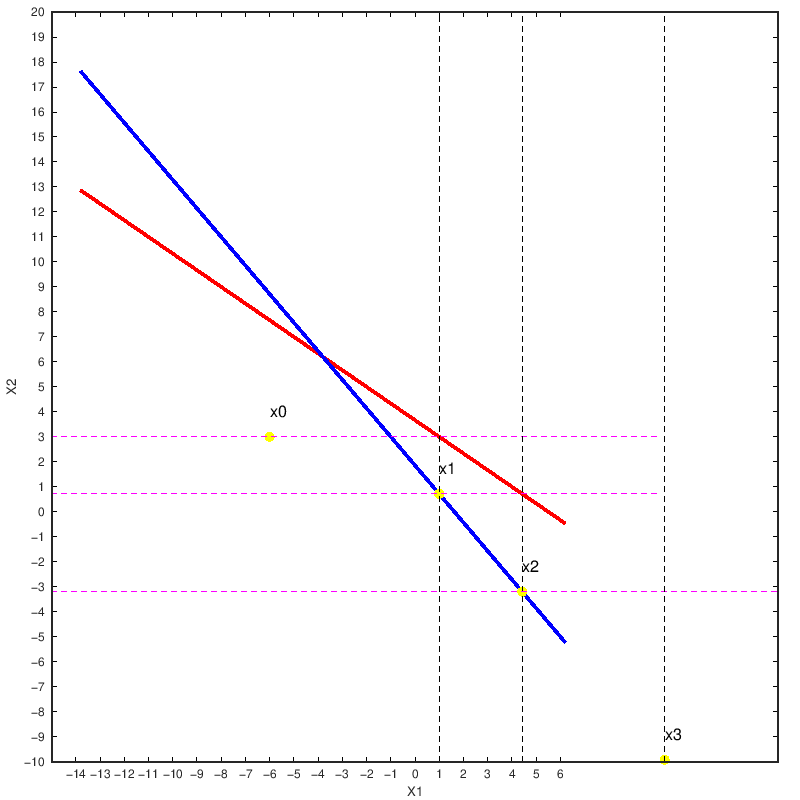

In [30]:
A=[2,3;8,7];
b=[11,13]';
draw_system(A,b)
[TJ,roJ]=test_conv_jacobi(A)
[TGZ,roGZ]=test_conv_gausz(A)
x=gausz_viz(A,b,[-6,3],3,10^-5)